In [1]:
#Read from CSV file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('SuperMarioWorld.csv', sep = ',', encoding = 'latin-1')
del df['URL']

print(df)


        Run ID   User ID         User Name               Category  Hours  \
0     nz1lrrme  qjnzw4jm         roopert83                96 Exit    1.0   
1     7z0jr8y5  7j425vx1            Truman                96 Exit    1.0   
2     8m70l4y0  qjn5p2jm  GreenDeathFlavor                11 Exit    0.0   
3     9mrldgmq  zx723r87        linkdeadx2                96 Exit    1.0   
4     9yon80zx  zxz764jq       WarpWhistle                11 Exit    0.0   
...        ...       ...               ...                    ...    ...   
6986  me6xog2z  8wkrq038        nemurichou                11 Exit    0.0   
6987  z1oj5vwm  8wkrq038        nemurichou                11 Exit    0.0   
6988  zpl4ldxm  xz9dode8       liii.malate                96 Exit    0.0   
6989  yv93o78z  8wk0m648            NIIKUU  No Cape, No Starworld    0.0   
6990  ylv0r5xm  8qzyyeq8          venquist                11 Exit    0.0   

      Minutes  Seconds Platform ID Platform Name  Verified        Date  
0        27.0 

In [2]:
#Clean data

df = df.loc[(df['Category'] == '96 Exit') & (df['Verified'] == 'verified') & (df['Date'].notnull())]
df = df.rename({'User Name': 'userName'}, axis=1)
df = df.sort_values(["Date"])
del df['Verified']
del df['Run ID']
del df['User ID']

totalSeconds = []

for x in range(len(df)):
    seconds = 0.0
    seconds += (df.iloc[x].Hours * 3600) + (df.iloc[x].Minutes * 60) + (df.iloc[x].Seconds)
    totalSeconds.append(seconds)

df['TimeSeconds'] = totalSeconds
df = df[['userName', 'Category', 'Hours', 'Minutes', 'Seconds', 'TimeSeconds', 'Platform Name', 'Date']]

print(df)

           userName Category  Hours  Minutes  Seconds  TimeSeconds  \
4996     GameCube04  96 Exit    1.0     31.0     45.0       5505.0   
1958         dram55  96 Exit    1.0     25.0     43.0       5143.0   
1276   ChristosOwen  96 Exit    1.0     37.0      2.0       5822.0   
1097         feasel  96 Exit    1.0     27.0     46.0       5266.0   
129          Alicon  96 Exit    1.0     50.0     55.0       6655.0   
...             ...      ...    ...      ...      ...          ...   
6861        tayrool  96 Exit    2.0     18.0     59.0       8339.0   
6880         uenono  96 Exit    1.0     25.0      6.0       5106.0   
6886  hiro_RTAenjoy  96 Exit    1.0     42.0     55.0       6175.0   
6923         uenono  96 Exit    1.0     24.0     32.0       5072.0   
6972        Picante  96 Exit    1.0     31.0     15.0       5475.0   

     Platform Name        Date  
4996          SNES  2005-01-13  
1958          SNES  2012-10-06  
1276          SNES  2012-11-24  
1097          SNES  2012-12

              userName Category  Hours  Minutes  Seconds  TimeSeconds  \
4996        GameCube04  96 Exit    1.0     31.0   45.000     5505.000   
1958            dram55  96 Exit    1.0     25.0   43.000     5143.000   
1960            dram55  96 Exit    1.0     24.0   35.000     5075.000   
54              dram55  96 Exit    1.0     24.0   18.000     5058.000   
1959        linkdeadx2  96 Exit    1.0     24.0   17.000     5057.000   
5               xpaco5  96 Exit    1.0     24.0   11.000     5051.000   
6              Kakusho  96 Exit    1.0     23.0   52.000     5032.000   
3           linkdeadx2  96 Exit    1.0     23.0   37.000     5017.000   
329   GreenDeathFlavor  96 Exit    1.0     23.0   28.000     5008.000   
387             Akisto  96 Exit    1.0     23.0   24.000     5004.000   
1093            Akisto  96 Exit    1.0     23.0   17.000     4997.000   
1320            Akisto  96 Exit    1.0     23.0   10.000     4990.000   
1617            Akisto  96 Exit    1.0     23.0    

Text(0.5, 1.0, 'Super Mario World (96 Exit) World Record Progression')

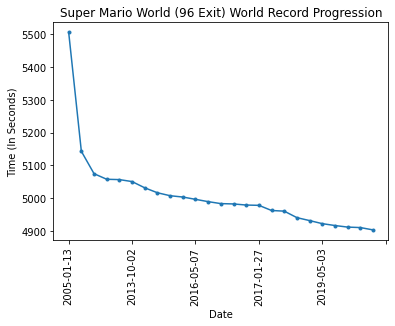

In [3]:
#Find World Record Progression

worldRecords = []
minTime = df.iloc[0].TimeSeconds

for x in range(len(df)):
    if df.iloc[x].TimeSeconds <= minTime:
        worldRecords.append(df.iloc[x])
        minTime = df.iloc[x].TimeSeconds

wrdf = pd.DataFrame(worldRecords)
print(wrdf)

wrdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Super Mario World (96 Exit) World Record Progression")

Number of improvements: 119
Number of same times: 107
Total runners: 226
      UserName  Fastest    First  PercentImprovement
225       Milk  36752.0  36752.0           -0.000000
186      b_e_n   8650.0   8650.0           -0.000000
104       Praw   5853.0   5853.0           -0.000000
105   pinguino   5857.0   5857.0           -0.000000
106       Remz   5877.0   5877.0           -0.000000
..         ...      ...      ...                 ...
80     Picante   5475.0  10938.0           49.945145
140  wqqqqwrtt   6624.0  16114.0           58.892888
28    Storster   5100.0  14939.0           65.861169
43   Xander479   5155.0  20889.0           75.321940
10         TNT   4996.0  27862.0           82.068767

[226 rows x 4 columns]


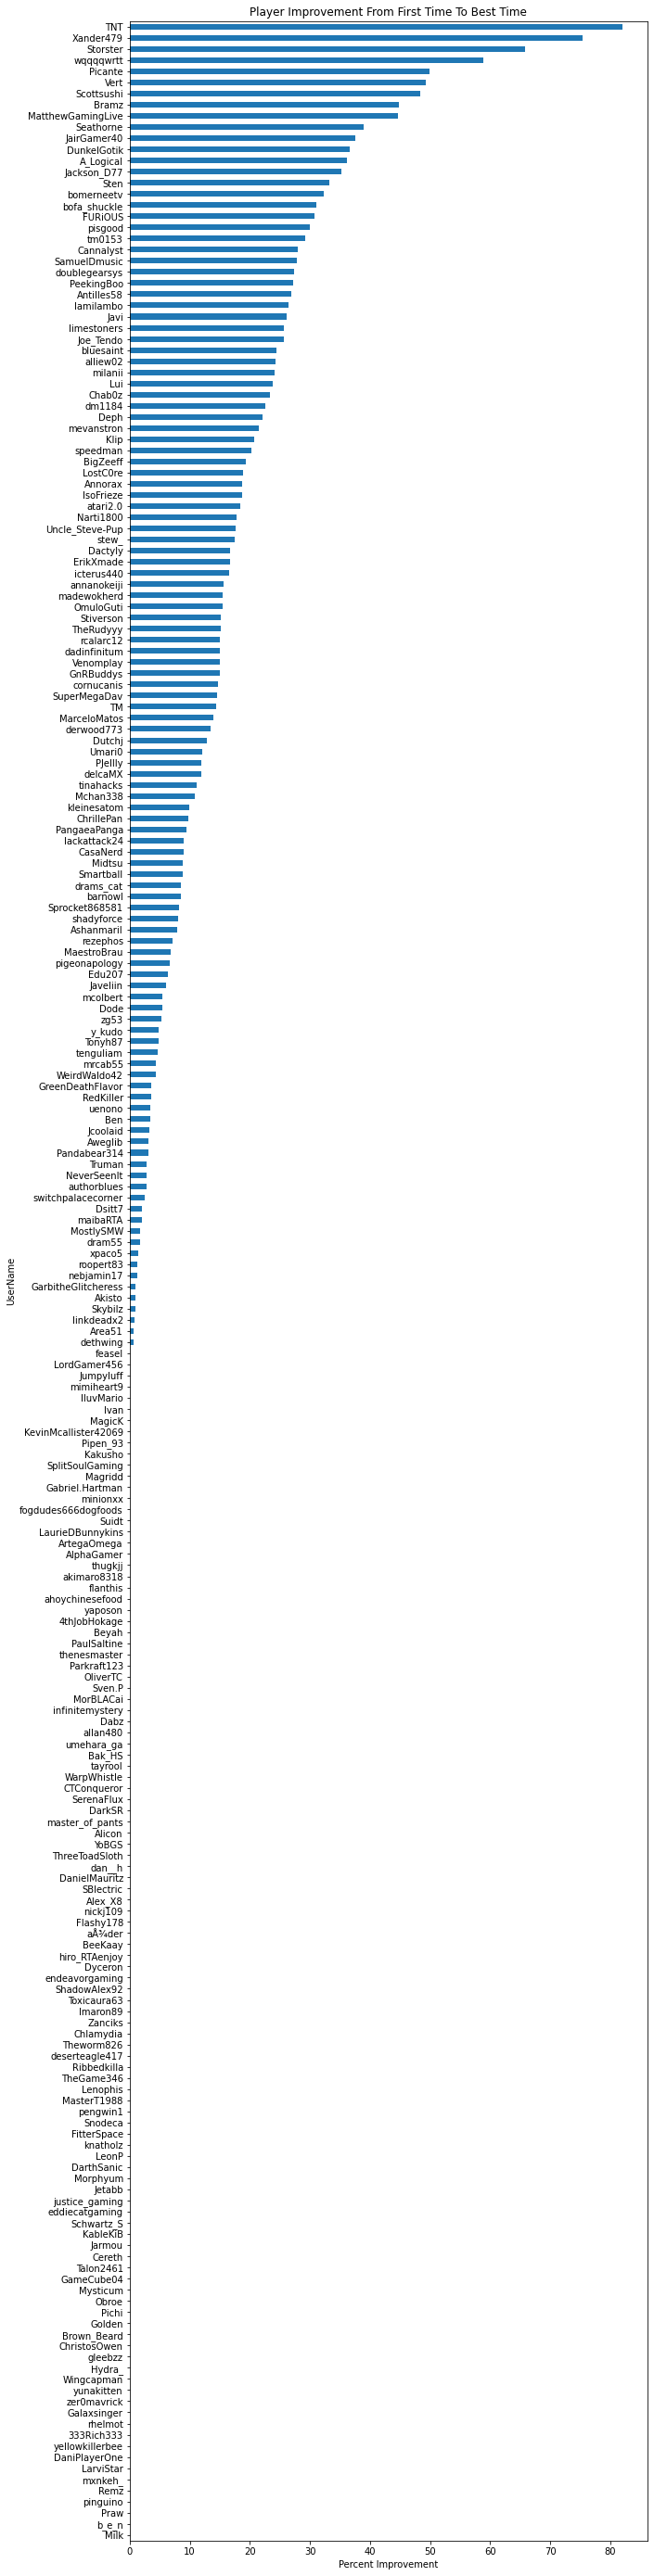

In [4]:
#Print Leadboard

rankingsFirst = df.sort_values(["Hours", "Minutes", "Seconds"])
rankingsFirst = rankingsFirst.drop_duplicates(subset = "userName")

rankingsLast = df.sort_values(["Date"])
rankingsLast = rankingsLast.drop_duplicates(subset = "userName")

quad = []

for x in range (len(rankingsFirst)):
    for y in range (len(rankingsLast)):
        if rankingsFirst.iloc[x].userName == rankingsLast.iloc[y].userName:
            fastest = rankingsFirst.iloc[x].TimeSeconds
            first = rankingsLast.iloc[y].TimeSeconds
            increase = (fastest - first) / first * 100
            increase = -increase
            quad.append((rankingsFirst.iloc[x].userName, fastest, first, increase))

count = 0
same = 0

for x in quad:
    if (x[1] < x[2]):
        count += 1
    elif (x[1] == x[2]):
        same += 1;
        
print("Number of improvements: " + str(count))
print("Number of same times: " + str(same))
print("Total runners: " + str(len(quad)))

improvementdf =  pd.DataFrame(quad, columns = ['UserName', 'Fastest', 'First', 'PercentImprovement'])
improvementdf = improvementdf.sort_values(["PercentImprovement"])
improvementdf.plot(kind = "barh", x = "UserName", y = "PercentImprovement", figsize = (10,50), legend = False)
plt.title("Player Improvement From First Time To Best Time")
plt.xlabel("Percent Improvement")
print(improvementdf)

     userName Category  Hours  Minutes  Seconds  TimeSeconds Platform Name  \
1618      Lui  96 Exit    1.0     47.0   12.000     6432.000          SNES   
2670      Lui  96 Exit    1.0     28.0   47.000     5327.000          SNES   
2789      Lui  96 Exit    1.0     26.0   45.000     5205.000          SNES   
2859      Lui  96 Exit    1.0     25.0   47.000     5147.000          SNES   
2989      Lui  96 Exit    1.0     24.0   46.000     5086.000          SNES   
3043      Lui  96 Exit    1.0     24.0   27.000     5067.000          SNES   
3067      Lui  96 Exit    1.0     24.0   12.000     5052.000          SNES   
3079      Lui  96 Exit    1.0     23.0   49.000     5029.000          SNES   
3220      Lui  96 Exit    1.0     23.0   26.000     5006.000          SNES   
3293      Lui  96 Exit    1.0     22.0   58.130     4978.130          SNES   
3358      Lui  96 Exit    1.0     22.0   48.530     4968.530          SNES   
3376      Lui  96 Exit    1.0     22.0   21.310     4941.310    

Text(0.5, 1.0, "Sten's Progression")

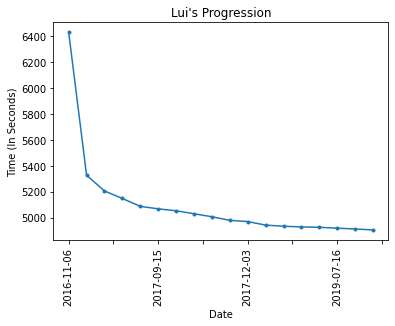

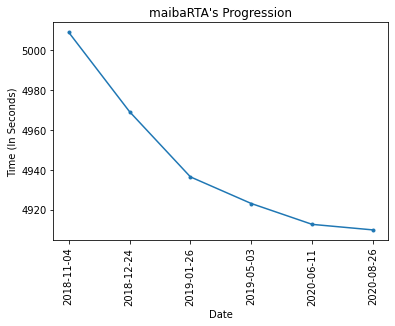

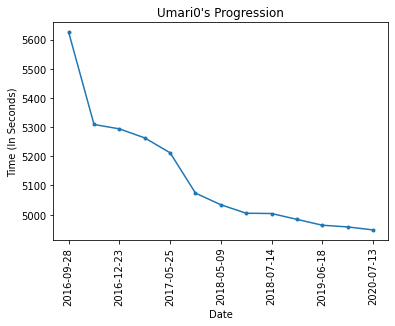

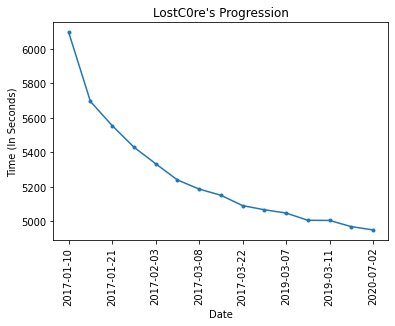

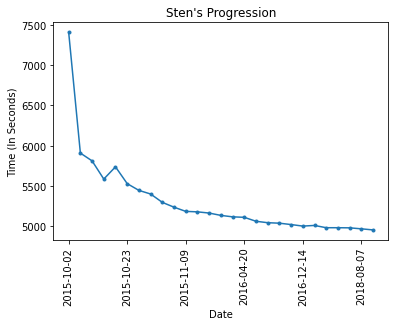

In [6]:
#Graph 5 Fastest Players

wrhdf = df.loc[df['userName'] == 'Lui']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Lui's Progression")

wrhdf = df.loc[df['userName'] == 'maibaRTA']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("maibaRTA's Progression")

wrhdf = df.loc[df['userName'] == 'Umari0']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Umari0's Progression")

wrhdf = df.loc[df['userName'] == 'LostC0re']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("LostC0re's Progression")

wrhdf = df.loc[df['userName'] == 'Sten']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Sten's Progression")

Text(0.5, 1.0, 'Super Mario World Platform Distribution')

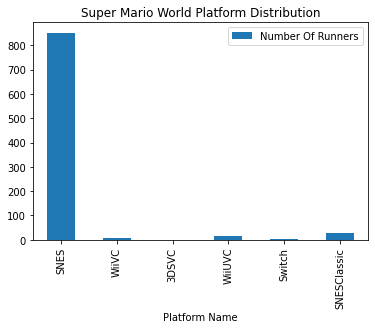

In [8]:
SNESCount = np.count_nonzero(df['Platform Name']=='SNES')
switchCount = np.count_nonzero(df['Platform Name']=='Switch')
wiiVCCount = np.count_nonzero(df['Platform Name']=='WiiVC')
ds3Count = np.count_nonzero(df['Platform Name']=='3DSVC')
wiiUVCCount = np.count_nonzero(df['Platform Name']=='WiiUVC')
SNESCCount = np.count_nonzero(df['Platform Name']=='SNESClassic')

platformsArray = ([ ['SNES', SNESCount], ['WiiVC', wiiVCCount], ['3DSVC', ds3Count], ['WiiUVC', wiiUVCCount], ['Switch', switchCount], ['SNESClassic', SNESCCount]])
platformdf = pd.DataFrame(data = platformsArray, columns = ['Platform Name', 'Number Of Runners'])

platformdf.plot(kind = 'bar', x='Platform Name', y='Number Of Runners', legend = True)
plt.title("Super Mario World Platform Distribution")

Text(0.5, 1.0, 'Super Mario World Quantity of Runs by Year')

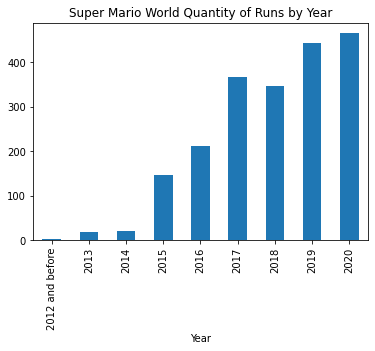

In [14]:
count2012 = np.count_nonzero(df['Date'] < '2013-01-01')
count2013 = np.count_nonzero(df['Date'] < '2014-01-01') - count2012
count2014 = np.count_nonzero(df['Date'] < '2015-01-01') - count2013
count2015 = np.count_nonzero(df['Date'] < '2016-01-01') - count2014
count2016 = np.count_nonzero(df['Date'] < '2017-01-01') - count2015
count2017 = np.count_nonzero(df['Date'] < '2018-01-01') - count2016
count2018 = np.count_nonzero(df['Date'] < '2019-01-01') - count2017
count2019 = np.count_nonzero(df['Date'] < '2020-01-01') - count2018
count2020 = np.count_nonzero(df['Date']) - count2019

monthsArray = ([ ['2012 and before', count2012], ['2013', count2013], ['2014', count2014], ['2015', count2015], ['2016', count2016], ['2017', count2017], ['2018', count2018], ['2019', count2019], ['2020', count2020]])
monthsdf = pd.DataFrame(data = monthsArray, columns = ['Year', 'Number of Runs Submitted'])

monthsdf.plot(kind = 'bar', x = 'Year', y='Number of Runs Submitted', legend = False)
plt.title("Super Mario World Quantity of Runs by Year")